库导入成功，中文字体设置完成。

--- 模拟信息表 (data1) ---
   商品大类 商品小类    商品名称   商品编号  商品销售价
0  运动上装   背心    瑜伽背心  bx001     48
1  运动上装   背心  跑步运动背心  bx002     39
2  运动上装   背心  纯色简约背心  bx003     36
3  运动上装   背心  轻薄透气背心  bx004     49
4  运动上装   背心  修身运动背心  bx005     50

--- 模拟销售数据表 (data2) ---
        订单日期          订单编号   商品编号  订单数量
0 2022-01-01  HS2022000001  fd003    26
1 2022-01-01  HS2022000002  fd004    28
2 2022-01-01  HS2022000003  sh001    20
3 2022-01-01  HS2022000004  sh003    35
4 2022-01-01  HS2022000005  bx002    60

--- 合并后的总数据表 (data_all) ---
   商品大类 商品小类     商品名称   商品编号  商品销售价       订单日期          订单编号  订单数量
0  运动配饰   发带   纯色弹力发带  fd003   12.0 2022-01-01  HS2022000001    26
1  运动配饰   发带  糖果色弹力发带  fd004   16.0 2022-01-01  HS2022000002    28
2  运动配饰   手环   篮球运动手环  sh001    8.0 2022-01-01  HS2022000003    20
3  运动配饰   手环  小清新硅胶手环  sh003    6.0 2022-01-01  HS2022000004    35
4  运动上装   背心   跑步运动背心  bx002   39.0 2022-01-01  HS2022000005    60

开始数据清洗与处理...
数据处理完成。
        订单日期  月份  商品销售价  订单数量    

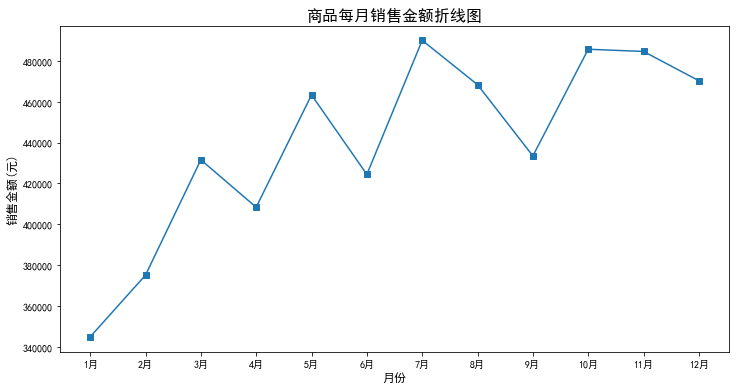


--- 每月销售金额统计表 ---
    月份      销售金额
0    1  344878.0
1    2  375111.0
2    3  431575.0
3    4  408359.0
4    5  463358.0
5    6  424416.0
6    7  490090.0
7    8  468356.0
8    9  433489.0
9   10  485727.0
10  11  484643.0
11  12  470306.0

生成各大类商品月度销售额对比图...


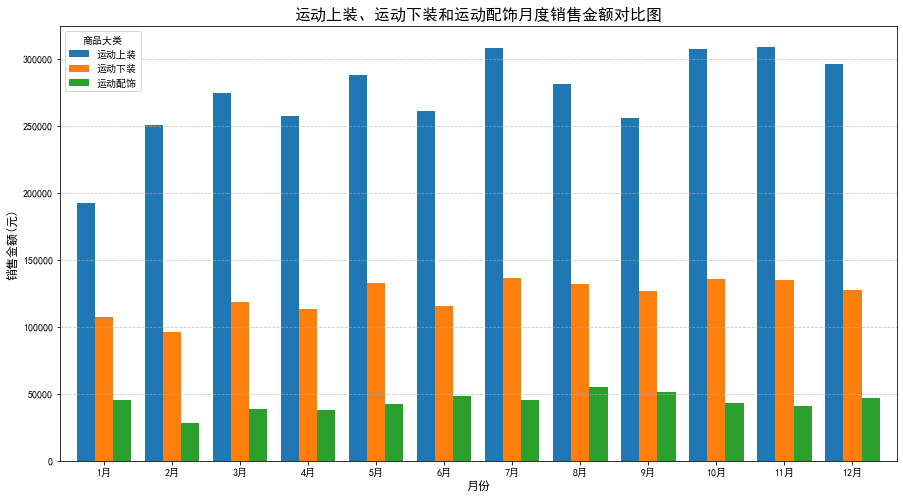


--- 各大类商品月度销售额数据表 ---
商品大类      运动上装      运动下装     运动配饰
月份                               
1     192671.0  107039.0  45168.0
2     250799.0   96170.0  28142.0
3     274574.0  118169.0  38832.0
4     257393.0  113111.0  37855.0
5     288187.0  132609.0  42562.0
6     260644.0  115136.0  48636.0
7     308293.0  136504.0  45293.0
8     281502.0  131772.0  55082.0
9     255780.0  126671.0  51038.0
10    306971.0  135827.0  42929.0
11    309149.0  134972.0  40522.0
12    296420.0  127334.0  46552.0


In [3]:
# ---------------------------------------------------------------------------
# 商品销售数据分析
# ---------------------------------------------------------------------------
#
# 简介:
# 本脚本根据提供的PDF文档中的步骤，对模拟的商品销售数据进行分析。
# 它涵盖了数据加载、清洗、处理、月度销售额分析和品类销售对比。
#
# 运行环境:
# 需要安装 pandas, numpy, 和 matplotlib 库。
# pip install pandas numpy matplotlib
#
# 注意:
# 为了使中文字符在图表中正确显示，请确保你的系统中安装了支持中文的字体，
# 例如 'SimHei' (黑体), 'Microsoft YaHei' (微软雅黑) 等。
#
# ---------------------------------------------------------------------------

# 1. 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 图表中文显示设置 ---
# 设置matplotlib字体以正确显示中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

print("库导入成功，中文字体设置完成。")


# ---------------------------------------------------------------------------
# 2. 获取数据 (模拟数据创建)
# ---------------------------------------------------------------------------
#
# 由于没有实际的 "商品销售数据.xlsx" 文件，我们根据PDF中的示例
# 手动创建DataFrame来模拟数据读取过程。
# 为了生成与PDF图表相似的结果，我们创建了更丰富的模拟数据。
#
# --- 模拟 "信息表" (data1) ---

data1 = pd.read_excel("商品销售数据.xlsx",sheet_name="信息表")
print("\n--- 模拟信息表 (data1) ---")
print(data1.head())
data2 = pd.read_excel("商品销售数据.xlsx",sheet_name="销售数据表")
print("\n--- 模拟销售数据表 (data2) ---")
print(data2.head())


# --- 合并数据 ---
# 根据 "商品编号" 将两个表合并，how='right' 确保所有销售记录都被保留
data_all = pd.merge(data1, data2, on='商品编号', how='right')
print("\n--- 合并后的总数据表 (data_all) ---")
print(data_all.head())


# ---------------------------------------------------------------------------
# 3. 数据清洗与处理
# ---------------------------------------------------------------------------
#
# 对合并后的数据进行必要的格式转换和计算，为分析做准备。
#
print("\n开始数据清洗与处理...")


# 将“订单日期”列的数据类型确保为 datetime
data_all['订单日期'] = pd.to_datetime(data_all['订单日期'])

# 新增“销售金额”列 (商品销售价 * 订单数量)
data_all['销售金额'] = data_all['商品销售价'] * data_all['订单数量']

# 新增“月份”列，从订单日期中提取
data_all['月份'] = data_all['订单日期'].dt.month

print("数据处理完成。")
print(data_all[['订单日期', '月份', '商品销售价', '订单数量', '销售金额']].head())


# ---------------------------------------------------------------------------
# 4. 分析商品每月销售变化趋势 (折线图)
# ---------------------------------------------------------------------------
print("\n生成每月销售金额折线图...")
# 按月份分组并计算销售金额总和
monthly_sales = data_all.groupby('月份')['销售金额'].sum().reset_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['月份'], monthly_sales['销售金额'], marker='s', linestyle='-')

# 设置图表标题和坐标轴标签
plt.title('商品每月销售金额折线图', fontsize=16)
plt.xlabel('月份', fontsize=12)
plt.ylabel('销售金额(元)', fontsize=12)

# 设置x轴刻度，使其显示为 "1月", "2月" 等
plt.xticks(ticks=monthly_sales['月份'], labels=[f'{i}月' for i in monthly_sales['月份']])
plt.grid(False)  # 与PDF样式保持一致

# 显示图表
plt.show()

print("\n--- 每月销售金额统计表 ---")
print(monthly_sales)


# ---------------------------------------------------------------------------
# 5. 分析各大类商品月度销售额 (柱状图)
# ---------------------------------------------------------------------------
print("\n生成各大类商品月度销售额对比图...")
# 按“月份”和“商品大类”分组，计算销售金额总和
# 使用 unstack() 将“商品大类”从索引转为列，方便绘图
category_monthly_sales = data_all.groupby(['月份', '商品大类'])['销售金额'].sum().unstack()

# 绘制分组柱状图
ax = category_monthly_sales.plot(kind='bar', figsize=(15, 8), width=0.8)

# 设置图表属性
plt.title('运动上装、运动下装和运动配饰月度销售金额对比图', fontsize=16)
plt.xlabel('月份', fontsize=12)
plt.ylabel('销售金额(元)', fontsize=12)
plt.xticks(ticks=range(len(category_monthly_sales.index)), labels=[f'{i}月' for i in category_monthly_sales.index], rotation=0)
plt.legend(title='商品大类')
plt.grid(axis='y', linestyle='--', alpha=0.7) # 添加y轴网格线以方便对比

# 显示图表
plt.show()

print("\n--- 各大类商品月度销售额数据表 ---")
print(category_monthly_sales.round(2)) # 保留两位小数
